# Reading and writing files

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from glob import glob

## Create netCDF file

In [2]:
ds = xr.Dataset({"foo": (("x", "y"), np.random.rand(4, 5))},
                coords={"x": [10, 20, 30, 40],
                        "y": pd.date_range("2000-01-01", periods=5),
                        "z": ("x", list("abcd")),},)

In [3]:
ds 

<xarray.Dataset>
Dimensions:  (x: 4, y: 5)
Coordinates:
  * x        (x) int64 10 20 30 40
  * y        (y) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-04 2000-01-05
    z        (x) <U1 'a' 'b' 'c' 'd'
Data variables:
    foo      (x, y) float64 0.1378 0.6289 0.05714 0.7314 ... 0.8824 0.535 0.761

## Save netCDF file
### By default, the file is saved as netCDF4

In [4]:
ds.to_netcdf("saved_on_disk.nc")

### We can load  netCDF file to create a `new Dataset` using `open_dataset()`

In [5]:
ds_disk = xr.open_dataset("saved_on_disk.nc")

In [6]:
ds_disk

<xarray.Dataset>
Dimensions:  (x: 4, y: 5)
Coordinates:
  * x        (x) int64 10 20 30 40
  * y        (y) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-04 2000-01-05
    z        (x) object ...
Data variables:
    foo      (x, y) float64 ...

`DataArray` can be saved to disk using the `DataArray.to_netcdf()` method and loaded from disk using the `open_dataarray()` function.

 ## The dataset can be closed using `Dataset.close()` or using the with command
 ## However, it’s often cleaner to use a `with` statement

In [7]:
with xr.open_dataset("saved_on_disk.nc") as ds:
    print(ds.keys())

KeysView(<xarray.Dataset>
Dimensions:  (x: 4, y: 5)
Coordinates:
  * x        (x) int64 10 20 30 40
  * y        (y) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-04 2000-01-05
    z        (x) object ...
Data variables:
    foo      (x, y) float64 ...)


### It is possible to append or overwrite netCDF variables using the `mode='a'` argument.

## NetCDF files follow some conventions for encoding to packing and unpacking data 
#### Such as datetime arrays (as numbers with a “units” attribute) 

#### We can customize how xarray writes `netCDF files` on disk by providing explicit `encodings`.

#### The `encoding argument` takes a dictionary with variable names as keys and variable specific encodings as values. 


#### These encodings are saved as attributes on the netCDF variables on disk, which allows xarray to read encoded data back into memory.

In [8]:
ds_disk["y"].encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/home/yoni/Desktop/Yaredo_Grads/Basemap_examples/saved_on_disk.nc',
 'original_shape': (5,),
 'dtype': dtype('int64'),
 'units': 'days since 2000-01-01 00:00:00',
 'calendar': 'proleptic_gregorian'}

In [9]:
ds_disk.encoding

{'unlimited_dims': set(),
 'source': '/home/yoni/Desktop/Yaredo_Grads/Basemap_examples/saved_on_disk.nc'}

# Reading multi-file datasets

## `Combining` and `reading multiple files` into a single file
## Method 1

## `netCDF` files can be combined using one of these functions
concat() <br>
merge() <br>
combine_nested() <br>
combine_by_coords()

### Xarray includes manipulating datasets that don’t fit into memory with dask. 
### You can open multiple files simultaneously in parallel using `open_mfdataset()`
### `open_mfdataset()` function automatically concatenates and merges multiple files into a single dataset


In [10]:
muti_nc = xr.open_mfdataset('/home/yoni/Desktop/Yaredo_Grads/clm_1/*.nc', parallel=True)

In [11]:
muti_nc

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 12, levdcmp: 15, levgrnd: 15, levlak: 10, levsoi: 10, lon: 7, time: 365)
Coordinates:
  * time          (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * levgrnd       (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * lon           (lon) float32 36.25 36.88 37.5 38.12 38.75 39.38 40.0
  * lat           (lat) float32 3.525 3.995 4.465 4.935 ... 7.755 8.225 8.695
Dimensions without coordinates: hist_interval, levsoi
Data variables:
    mcdate        (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mcsec         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mdcur         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mscur         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    nstep         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    time_bounds   (time, hist_interval) object dask.array<chunksize=(2, 2), meta=np.ndarray>
    date_written  (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    time_written  (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    area          (lat, lon, time) float32 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    landfrac      (lat, lon, time) float32 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    landmask      (lat, lon, time) float64 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    pftmask       (lat, lon, time) float64 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    nbedrock      (lat, lon, time) float64 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    ZSOI          (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    DZSOI         (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    WATSAT        (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    SUCSAT        (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    BSW           (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    HKSAT         (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    ZLAKE         (levlak, lat, lon) float32 dask.array<chunksize=(10, 12, 7), meta=np.ndarray>
    DZLAKE        (levlak, lat, lon) float32 dask.array<chunksize=(10, 12, 7), meta=np.ndarray>
    EFLX_LH_TOT   (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    FSH           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    H2OSOI        (time, levsoi, lat, lon) float32 dask.array<chunksize=(2, 10, 12, 7), meta=np.ndarray>
    PSurf         (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    RH2M          (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TG            (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TSA           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TSKIN         (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TSOI          (time, levgrnd, lat, lon) float32 dask.array<chunksize=(2, 15, 12, 7), meta=np.ndarray>
    TSOI_10CM     (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TV            (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TWS           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    U10           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    WIND          (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
Attributes:
    title:                                     CLM History file information
    comment:                               

## Method 2 (Good method!!!)

The following command concatenates variables along the `time dimension`, but only those that already contain the `time` dimension are considered.

Variables that lack the `time dimension` are taken from the first dataset (compat='override').

In [12]:
muti_nc1 = xr.open_mfdataset('/home/yoni/Desktop/Yaredo_Grads/clm_1/*.nc', concat_dim="time", combine="nested",
                             data_vars='minimal', coords='minimal', compat='override')

In [13]:
muti_nc1

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 12, levdcmp: 15, levgrnd: 15, levlak: 10, levsoi: 10, lon: 7, time: 365)
Coordinates:
  * levgrnd       (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * time          (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * lon           (lon) float32 36.25 36.88 37.5 38.12 38.75 39.38 40.0
  * lat           (lat) float32 3.525 3.995 4.465 4.935 ... 7.755 8.225 8.695
Dimensions without coordinates: hist_interval, levsoi
Data variables:
    mcdate        (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds   (time, hist_interval) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    date_written  (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    time_written  (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    area          (lat, lon) float32 dask.array<chunksize=(12, 7), meta=np.ndarray>
    landfrac      (lat, lon) float32 dask.array<chunksize=(12, 7), meta=np.ndarray>
    landmask      (lat, lon) float64 dask.array<chunksize=(12, 7), meta=np.ndarray>
    pftmask       (lat, lon) float64 dask.array<chunksize=(12, 7), meta=np.ndarray>
    nbedrock      (lat, lon) float64 dask.array<chunksize=(12, 7), meta=np.ndarray>
    ZSOI          (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    DZSOI         (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    WATSAT        (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    SUCSAT        (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    BSW           (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    HKSAT         (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    ZLAKE         (levlak, lat, lon) float32 dask.array<chunksize=(10, 12, 7), meta=np.ndarray>
    DZLAKE        (levlak, lat, lon) float32 dask.array<chunksize=(10, 12, 7), meta=np.ndarray>
    EFLX_LH_TOT   (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    FSH           (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    H2OSOI        (time, levsoi, lat, lon) float32 dask.array<chunksize=(1, 10, 12, 7), meta=np.ndarray>
    PSurf         (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    RH2M          (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    TG            (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    TSA           (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    TSKIN         (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    TSOI          (time, levgrnd, lat, lon) float32 dask.array<chunksize=(1, 15, 12, 7), meta=np.ndarray>
    TSOI_10CM     (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    TV            (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    TWS           (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    U10           (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
    WIND          (time, lat, lon) float32 dask.array<chunksize=(1, 12, 7), meta=np.ndarray>
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:     

## Method 3

In [14]:
ds_comb_1 = xr.open_mfdataset('/home/yoni/Desktop/Yaredo_Grads/clm_1/*.nc',combine = 'by_coords', concat_dim="time")

In [15]:
ds_comb_1

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 12, levdcmp: 15, levgrnd: 15, levlak: 10, levsoi: 10, lon: 7, time: 365)
Coordinates:
  * time          (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * levgrnd       (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * lon           (lon) float32 36.25 36.88 37.5 38.12 38.75 39.38 40.0
  * lat           (lat) float32 3.525 3.995 4.465 4.935 ... 7.755 8.225 8.695
Dimensions without coordinates: hist_interval, levsoi
Data variables:
    mcdate        (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mcsec         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mdcur         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mscur         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    nstep         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    time_bounds   (time, hist_interval) object dask.array<chunksize=(2, 2), meta=np.ndarray>
    date_written  (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    time_written  (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    area          (lat, lon, time) float32 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    landfrac      (lat, lon, time) float32 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    landmask      (lat, lon, time) float64 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    pftmask       (lat, lon, time) float64 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    nbedrock      (lat, lon, time) float64 dask.array<chunksize=(12, 7, 2), meta=np.ndarray>
    ZSOI          (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    DZSOI         (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    WATSAT        (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    SUCSAT        (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    BSW           (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    HKSAT         (levgrnd, lat, lon) float32 dask.array<chunksize=(15, 12, 7), meta=np.ndarray>
    ZLAKE         (levlak, lat, lon) float32 dask.array<chunksize=(10, 12, 7), meta=np.ndarray>
    DZLAKE        (levlak, lat, lon) float32 dask.array<chunksize=(10, 12, 7), meta=np.ndarray>
    EFLX_LH_TOT   (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    FSH           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    H2OSOI        (time, levsoi, lat, lon) float32 dask.array<chunksize=(2, 10, 12, 7), meta=np.ndarray>
    PSurf         (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    RH2M          (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TG            (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TSA           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TSKIN         (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TSOI          (time, levgrnd, lat, lon) float32 dask.array<chunksize=(2, 15, 12, 7), meta=np.ndarray>
    TSOI_10CM     (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TV            (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    TWS           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    U10           (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
    WIND          (time, lat, lon) float32 dask.array<chunksize=(2, 12, 7), meta=np.ndarray>
Attributes:
    title:                                     CLM History file information
    comment:                               

## Method 4: using loop

In [16]:

def read_netcdfs(files, dim):
    paths = sorted(glob(files))
    datasets = [xr.open_dataset(p) for p in paths]
    combined = xr.concat(datasets, dim,  data_vars='minimal', coords='minimal', compat='override')
    return combined

combined = read_netcdfs('/home/yoni/Desktop/Yaredo_Grads/clm_1/*.nc', dim='time')

In [17]:
combined

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 12, levdcmp: 15, levgrnd: 15, levlak: 10, levsoi: 10, lon: 7, time: 365)
Coordinates:
  * levgrnd       (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * time          (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * lon           (lon) float32 36.25 36.88 37.5 38.12 38.75 39.38 40.0
  * lat           (lat) float32 3.525 3.995 4.465 4.935 ... 7.755 8.225 8.695
Dimensions without coordinates: hist_interval, levsoi
Data variables:
    mcdate        (time) int32 10101 10102 10103 10104 ... 11229 11230 11231
    mcsec         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    mdcur         (time) int32 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
    mscur         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nstep         (time) int32 0 48 96 144 192 ... 17280 17328 17376 17424 17472
    time_bounds   (time, hist_interval) object 0000-12-31 23:30:00 ... 0001-1...
    date_written  (time) |S16 b'01/09/21' b'01/09/21' ... b'01/09/21'
    time_written  (time) |S16 b'10:22:47\xff\xff\xff\xff\xff\xff\xff\xff' ......
    area          (lat, lon) float32 ...
    landfrac      (lat, lon) float32 ...
    landmask      (lat, lon) float64 ...
    pftmask       (lat, lon) float64 ...
    nbedrock      (lat, lon) float64 ...
    ZSOI          (levgrnd, lat, lon) float32 ...
    DZSOI         (levgrnd, lat, lon) float32 ...
    WATSAT        (levgrnd, lat, lon) float32 ...
    SUCSAT        (levgrnd, lat, lon) float32 ...
    BSW           (levgrnd, lat, lon) float32 ...
    HKSAT         (levgrnd, lat, lon) float32 ...
    ZLAKE         (levlak, lat, lon) float32 ...
    DZLAKE        (levlak, lat, lon) float32 ...
    EFLX_LH_TOT   (time, lat, lon) float32 102.9 0.5178 1.831 ... 23.47 22.54
    FSH           (time, lat, lon) float32 10.26 7.47 -3.945 ... 57.2 47.91
    H2OSOI        (time, levsoi, lat, lon) float32 0.06369 0.06299 ... 0.2234
    PSurf         (time, lat, lon) float32 9.625e+04 9.458e+04 ... 8.531e+04
    RH2M          (time, lat, lon) float32 36.49 34.41 33.23 ... 68.02 59.0
    TG            (time, lat, lon) float32 296.6 293.8 292.9 ... 296.9 298.4
    TSA           (time, lat, lon) float32 294.1 292.6 292.5 ... 291.7 293.8
    TSKIN         (time, lat, lon) float32 293.4 292.9 291.8 ... 294.6 296.9
    TSOI          (time, levgrnd, lat, lon) float32 295.0 293.8 ... 295.7 301.1
    TSOI_10CM     (time, lat, lon) float32 298.0 297.7 296.2 ... 297.1 298.7
    TV            (time, lat, lon) float32 293.5 291.7 291.0 ... 293.6 295.8
    TWS           (time, lat, lon) float32 -926.7 -3.049e+03 ... 1.064e+03 539.9
    U10           (time, lat, lon) float32 2.591 3.321 2.878 ... 1.509 1.495
    WIND          (time, lat, lon) float32 3.33 3.769 3.671 ... 1.549 1.446
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 01/09/21 10:22:47
    source:                                    Community Terrestrial Systems ...
    hostname:                                  container
    username:                                  user
    version:                                   cesm2.2.0
    revision_id:                               $Id: histFileMod.F90 42903 201...
    case_title:                                UNSET
    case_id:                                   RiftvalleyET_1850_Clm45_BgcGs_f50
    Surface_dataset:                           surfdata_7x12pt_f05_Riftvalley...
    Initial_conditions_dataset:                finidat_interp_dest.nc
    PFT_physiological_constants_dataset:       clm45_params.c200624.nc
    ltype_vegetated_or_bar

## Method 5: using loop (more safe method)

In [18]:
def read_netcdfs(files, dim, transform_func=None):
    def process_one_path(path):
        # use a context manager, to ensure the file gets closed after use
        with xr.open_dataset(path) as ds:
            # transform_func should do some sort of selection or
            # aggregation
            if transform_func is not None:
                ds = transform_func(ds)
            # load all data from the transformed dataset, to ensure we can
            # use it after closing each original file
            ds.load()
            return ds

    paths = sorted(glob(files))
    datasets = [process_one_path(p) for p in paths]
    combined1 = xr.concat(datasets, dim, data_vars='minimal', coords='minimal', compat='override')
    return combined1

# here we suppose we only care about the combined mean of each file;
# you might also use indexing operations like .sel to subset datasets
combined1 = read_netcdfs('/home/yoni/Desktop/Yaredo_Grads/clm_1/*.nc', dim='time')                        

In [19]:
combined1

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 12, levdcmp: 15, levgrnd: 15, levlak: 10, levsoi: 10, lon: 7, time: 365)
Coordinates:
  * levgrnd       (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * time          (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * lon           (lon) float32 36.25 36.88 37.5 38.12 38.75 39.38 40.0
  * lat           (lat) float32 3.525 3.995 4.465 4.935 ... 7.755 8.225 8.695
Dimensions without coordinates: hist_interval, levsoi
Data variables:
    mcdate        (time) int32 10101 10102 10103 10104 ... 11229 11230 11231
    mcsec         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    mdcur         (time) int32 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
    mscur         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nstep         (time) int32 0 48 96 144 192 ... 17280 17328 17376 17424 17472
    time_bounds   (time, hist_interval) object 0000-12-31 23:30:00 ... 0001-1...
    date_written  (time) |S16 b'01/09/21' b'01/09/21' ... b'01/09/21'
    time_written  (time) |S16 b'10:22:47\xff\xff\xff\xff\xff\xff\xff\xff' ......
    area          (lat, lon) float32 3.625e+03 3.625e+03 ... 3.59e+03 3.59e+03
    landfrac      (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    landmask      (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    pftmask       (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    nbedrock      (lat, lon) float64 10.0 10.0 10.0 10.0 ... 10.0 10.0 10.0 10.0
    ZSOI          (levgrnd, lat, lon) float32 0.007101 0.007101 ... 35.18 35.18
    DZSOI         (levgrnd, lat, lon) float32 0.01751 0.01751 ... 13.85 13.85
    WATSAT        (levgrnd, lat, lon) float32 0.4385 0.4386 ... 0.4411 0.4197
    SUCSAT        (levgrnd, lat, lon) float32 199.3 199.2 199.3 ... 241.1 144.4
    BSW           (levgrnd, lat, lon) float32 5.743 5.742 5.743 ... 7.68 4.023
    HKSAT         (levgrnd, lat, lon) float32 0.004385 0.004386 ... 0.006398
    ZLAKE         (levlak, lat, lon) float32 0.05 nan nan nan ... nan nan nan
    DZLAKE        (levlak, lat, lon) float32 0.1 nan nan nan ... nan nan nan nan
    EFLX_LH_TOT   (time, lat, lon) float32 102.9 0.5178 1.831 ... 23.47 22.54
    FSH           (time, lat, lon) float32 10.26 7.47 -3.945 ... 57.2 47.91
    H2OSOI        (time, levsoi, lat, lon) float32 0.06369 0.06299 ... 0.2234
    PSurf         (time, lat, lon) float32 9.625e+04 9.458e+04 ... 8.531e+04
    RH2M          (time, lat, lon) float32 36.49 34.41 33.23 ... 68.02 59.0
    TG            (time, lat, lon) float32 296.6 293.8 292.9 ... 296.9 298.4
    TSA           (time, lat, lon) float32 294.1 292.6 292.5 ... 291.7 293.8
    TSKIN         (time, lat, lon) float32 293.4 292.9 291.8 ... 294.6 296.9
    TSOI          (time, levgrnd, lat, lon) float32 295.0 293.8 ... 295.7 301.1
    TSOI_10CM     (time, lat, lon) float32 298.0 297.7 296.2 ... 297.1 298.7
    TV            (time, lat, lon) float32 293.5 291.7 291.0 ... 293.6 295.8
    TWS           (time, lat, lon) float32 -926.7 -3.049e+03 ... 1.064e+03 539.9
    U10           (time, lat, lon) float32 2.591 3.321 2.878 ... 1.509 1.495
    WIND          (time, lat, lon) float32 3.33 3.769 3.671 ... 1.549 1.446
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 01/09/21 10:22:47
    source:                                    Community Terrestrial Systems ...
    hostname:                                  container
    username:                                  user
    version:                                   cesm2.2.0
    revision_id:                

## Method 2: Another example (Good method!!!)

In [20]:
muti_nc2 = xr.open_mfdataset('/home/yoni/Desktop/Yaredo_Grads/2018/*.nc', concat_dim="time", combine="nested",
                             data_vars='minimal', coords='minimal', compat='override')

In [21]:
muti_nc2

<xarray.Dataset>
Dimensions:  (lat: 321, lon: 401, time: 36)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-01 ... 2018-12-01
  * lat      (lat) float64 15.0 14.96 14.93 14.89 ... 3.113 3.075 3.037 3.0
  * lon      (lon) float64 33.0 33.04 33.08 33.11 ... 47.89 47.92 47.96 48.0
Data variables:
    rfe      (time, lat, lon) float32 dask.array<chunksize=(1, 321, 401), meta=np.ndarray>
Attributes:
    title:        TAMSAT Rain Fall Estimate (RFE)
    institution:  TAMSAT Research Group, Meteorology Department, University o...
    contact:      tamsat@reading.ac.uk
    Conventions:  CF-1.5
    history:      Processed from TIR archive using satop2 with max_gap[mins]=360
    latmin:       3.0
    latmax:       15.0
    lonmin:       33.0
    lonmax:       48.0
    latres:       0.0375
    lonres:       0.0375

## Ploting Zonal mean (along the longitude)

In [22]:
import seaborn as sns; sns.set(color_codes=True)

In [23]:
TSA_dk = muti_nc1.TSA

In [24]:
TSA_dk

<xarray.DataArray 'TSA' (time: 365, lat: 12, lon: 7)>
dask.array<concatenate, shape=(365, 12, 7), dtype=float32, chunksize=(1, 12, 7), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * lon      (lon) float32 36.25 36.88 37.5 38.12 38.75 39.38 40.0
  * lat      (lat) float32 3.525 3.995 4.465 4.935 ... 7.285 7.755 8.225 8.695
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [25]:
muti_nc1.lat

<xarray.DataArray 'lat' (lat: 12)>
array([3.524804, 3.994778, 4.464752, 4.934726, 5.4047  , 5.874674, 6.344647,
       6.814621, 7.284595, 7.754569, 8.224543, 8.694517], dtype=float32)
Coordinates:
  * lat      (lat) float32 3.525 3.995 4.465 4.935 ... 7.285 7.755 8.225 8.695
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north

In [26]:
time = muti_nc1.time

In [27]:
time

<xarray.DataArray 'time' (time: 365)>
array([cftime.DatetimeNoLeap(0001-01-01 00:00:00),
       cftime.DatetimeNoLeap(0001-01-02 00:00:00),
       cftime.DatetimeNoLeap(0001-01-03 00:00:00), ...,
       cftime.DatetimeNoLeap(0001-12-29 00:00:00),
       cftime.DatetimeNoLeap(0001-12-30 00:00:00),
       cftime.DatetimeNoLeap(0001-12-31 00:00:00)], dtype=object)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bounds

### Make the time information understandable for Python

In [28]:
time = pd.to_datetime(time.data)
### This is because the date format of CLM model is not is not convertible to datetime, but it works for other model 

TypeError: <class 'cftime._cftime.DatetimeNoLeap'> is not convertible to datetime

In [29]:
lat  = muti_nc1.lat
lon  = muti_nc1.lon

### Find the latitudes indexes for the region  

Lets plot zonal mean SST in tropics (3-15) latitudes
We can use numpy library to find quickly indexes for the region

In [30]:
np.intersect1d(np.where(lat<8.694517),np.where(lat>=3.524804))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
 print(lat[0:11])

<xarray.DataArray 'lat' (lat: 11)>
array([3.524804, 3.994778, 4.464752, 4.934726, 5.4047  , 5.874674, 6.344647,
       6.814621, 7.284595, 7.754569, 8.224543], dtype=float32)
Coordinates:
  * lat      (lat) float32 3.525 3.995 4.465 4.935 ... 6.815 7.285 7.755 8.225
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north


### Calculate zonal mean 

In [32]:
TSA_zm = np.mean(TSA_dk, axis=2)

In [33]:
TSA_zm

<xarray.DataArray 'TSA' (time: 365, lat: 12)>
dask.array<mean_agg-aggregate, shape=(365, 12), dtype=float32, chunksize=(1, 12), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * lat      (lat) float32 3.525 3.995 4.465 4.935 ... 7.285 7.755 8.225 8.695

In [34]:
TSA_et = TSA_zm[:, 0:11]

In [35]:
TSA_et

<xarray.DataArray 'TSA' (time: 365, lat: 11)>
dask.array<getitem, shape=(365, 11), dtype=float32, chunksize=(1, 11), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * lat      (lat) float32 3.525 3.995 4.465 4.935 ... 6.815 7.285 7.755 8.225

### Average over the domain

In [36]:
TSA_final = np.mean(TSA_et, axis = 1)

In [37]:
TSA_final

<xarray.DataArray 'TSA' (time: 365)>
dask.array<mean_agg-aggregate, shape=(365,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00

### Finally do the plotting

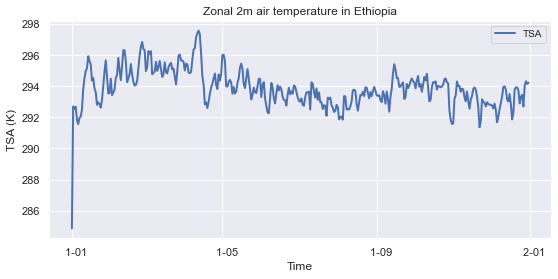

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 4))
plt.plot(time, TSA_final, color='b', linewidth=2., linestyle='-', alpha=1., label='TSA')
plt.title('Zonal 2m air temperature in Ethiopia')
plt.xlabel('Time')
plt.ylabel('TSA (K)')
plt.legend(fontsize=10)

# Iris

## Iris is a powerful tool used for manipulating multi-dimensional earth science data.

## Iris has data manipulation and visualisation features such as:

#### A visualisation interface based on matplotlib and cartopy

#### Unit conversion

#### Subsetting and extraction of data

#### Merge and concatenate

####  Aggregations and reductions (including min, max, mean and weighted averages)

#### Interpolation and regridding (including nearest-neighbor, linear and area-weighted)

#### `Iris` allows easy reading of common meteorological and climate model formats, while enforcing a `CF-compliant` data model.

In [40]:
import iris

In [41]:
print(iris.__version__)

2.4.0


### `cube` is the top level object in Iris. 

### `cube` contains data and metadata about a single phenomenon 

### `cube` is an implementation of the data model from the Climate and Forecast (CF) Metadata conventions

## construct a cube from xarray 

In [42]:
da_1 = xr.DataArray( np.random.rand(4, 5), dims=["x", "y"], coords=dict(x=[10, 20, 30, 40], 
                       y=pd.date_range("2000-01-01", periods=5)),)

In [43]:
cube_1 = da_1.to_iris()
cube_1

Unknown (unknown),x,y
Shape,4,5
Dimension coordinates,,
x,x,-
y,-,x


### Conversely, we can create a new `DataArray` object from a `Cube` using `DataArray.from_iris()`:

In [44]:
da_cube = xr.DataArray.from_iris(cube_1)
da_cube

<xarray.DataArray (x: 4, y: 5)>
array([[0.313523, 0.67493 , 0.807689, 0.603837, 0.437318],
       [0.956943, 0.08702 , 0.31785 , 0.348487, 0.626402],
       [0.490727, 0.219583, 0.957324, 0.261709, 0.502733],
       [0.389685, 0.637588, 0.066673, 0.747697, 0.582139]])
Coordinates:
  * x        (x) int64 10 20 30 40
  * y        (y) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-04 2000-01-05

### Load the example dataset

In [45]:
fname = iris.sample_data_path('uk_hires.pp')
fname

'/home/yoni/anaconda3/lib/python3.8/site-packages/iris_sample_data/sample_data/uk_hires.pp'

In [46]:
cubes_2 = iris.load(fname)
print(cubes_2)

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)
1: surface_altitude / (m)              (grid_latitude: 204; grid_longitude: 187)


## Let's see one of the cubes

In [47]:
air_pot_temp = cubes_2[0]
print(air_pot_temp)

air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)
     Dimension coordinates:
          time                           x                      -                 -                    -
          model_level_number             -                      x                 -                    -
          grid_latitude                  -                      -                 x                    -
          grid_longitude                 -                      -                 -                    x
     Auxiliary coordinates:
          forecast_period                x                      -                 -                    -
          level_height                   -                      x                 -                    -
          sigma                          -                      x                 -                    -
          surface_altitude               -                      -                 x                

## Cube attributes

In [48]:
cube_3 = iris.load_cube(iris.sample_data_path('A1B_north_america.nc'))
print(cube_3)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


### `cube_3.data.shape` or `cube_3.data.ndim` commands can be used to find the shape of a cube’s data
### Instead it is good to use the `print()`  function which will avoid  loading and unloading the data

In [49]:
print(cube_3.shape)
print(cube_3.ndim)
print(type(cube_3.data))

(240, 37, 49)
3
<class 'numpy.ma.core.MaskedArray'>


### The `standard_name`, `long_name` and to an extent `var_name` are all attributes to describe the phenomenon that the cube represents.

In [50]:
print(cube_3.standard_name)
print(cube_3.long_name)
print(cube_3.var_name)
print(cube_3.name())

air_temperature
None
air_temperature
air_temperature


### `Iris` can deal with `CF-convention` formatted data, but it also supports `non-CF` data too. 
### To illustrate this, we can change the name of our cube and see how Iris deals with this:

In [51]:
cube_3.rename("A name that isn't a valid CF standard name")
print(cube_3.standard_name)
print(cube_3.long_name)
print(cube_3.var_name)
print(cube_3.name())

None
A name that isn't a valid CF standard name
None
A name that isn't a valid CF standard name


### `units attribute` on a cube tells us the units of the numbers held in the data array. 
### We can manually change the units, or better, we can convert the cube to another unit using the `convert_units` which will automatically update the data array.

In [52]:
print(cube_3.units)
print(cube_3.data.max())
cube_3.convert_units('Celsius')
print(cube_3.units)
print(cube_3.data.max())

K
306.0733
Celsius
32.9233


### `cube` has a dictionary for  general purpose attributes,which can be accessed with the `cube.attributes`

In [53]:
print(cube_3.attributes)
print(cube_3.attributes['STASH'])

{'Conventions': 'CF-1.5', 'STASH': STASH(model=1, section=3, item=236), 'Model scenario': 'A1B', 'source': 'Data from Met Office Unified Model 6.05'}
m01s03i236


# Coordinates

### `coords` or `coord` methods are used to access the cube coordinates 

In [54]:
time = cube_3.coord('time')
print(time[:4])

DimCoord([1860-06-01 00:00:00, 1861-06-01 00:00:00, 1862-06-01 00:00:00,
       1863-06-01 00:00:00], bounds=[[1859-12-01 00:00:00, 1860-12-01 00:00:00],
       [1860-12-01 00:00:00, 1861-12-01 00:00:00],
       [1861-12-01 00:00:00, 1862-12-01 00:00:00],
       [1862-12-01 00:00:00, 1863-12-01 00:00:00]], standard_name='time', calendar='360_day', var_name='time')


In [55]:
print(repr(time.units))
print(time.points[:4])
print(time.bounds[:4])

Unit('hours since 1970-01-01 00:00:00', calendar='360_day')
[-946800. -938160. -929520. -920880.]
[[-951120. -942480.]
 [-942480. -933840.]
 [-933840. -925200.]
 [-925200. -916560.]]


### These numbers can be converted to `datetime objects` with the unit’s `num2date` method and dates can be converted back again with the `date2num` method

In [56]:
import datetime

print(time.units.num2date(time.points[:4]))
print(time.units.date2num(datetime.datetime(1970, 2, 1)))

[cftime.Datetime360Day(1860-06-01 00:00:00)
 cftime.Datetime360Day(1861-06-01 00:00:00)
 cftime.Datetime360Day(1862-06-01 00:00:00)
 cftime.Datetime360Day(1863-06-01 00:00:00)]
720.0


## We can retrieve coordinate information by examining the `latitude variable`

In [57]:
lat = cube_3.coord('latitude')
print(lat.coord_system)

GeogCS(6371229.0)


## Loading and saving data
### Iris load functions:
### There are three main load functions in Iris: 
load: is a general purpose loading function <br>
load_cube: returns a single cube from the given source(s) and constraint. <br>
load_cubes: returns a list of cubes from the given sources(s) and constraint(s). 

In [58]:
fname = iris.sample_data_path('air_temp.pp')
c1, = iris.load(fname)
c2 = iris.load_cube(fname)
c1 == c2   

True

## Saving cubes

### `iris.save` function provides a convenient interface to save `Cube` and `CubeList` 

In [59]:
fname = iris.sample_data_path('uk_hires.pp')
cubes_4 = iris.load(fname)
iris.save(cubes_4, 'saved_cubes.nc')

 ## Inspect the netcdf file

In [60]:
!ncdump -h saved_cubes.nc | head -n 20

netcdf saved_cubes {
dimensions:
	time = 3 ;
	model_level_number = 7 ;
	grid_latitude = 204 ;
	grid_longitude = 187 ;
	bnds = 2 ;
variables:
	float air_potential_temperature(time, model_level_number, grid_latitude, grid_longitude) ;
		air_potential_temperature:standard_name = "air_potential_temperature" ;
		air_potential_temperature:units = "K" ;
		air_potential_temperature:um_stash_source = "m01s00i004" ;
		air_potential_temperature:grid_mapping = "rotated_latitude_longitude" ;
		air_potential_temperature:coordinates = "forecast_period forecast_reference_time level_height sigma surface_altitude" ;
	int rotated_latitude_longitude ;
		rotated_latitude_longitude:grid_mapping_name = "rotated_latitude_longitude" ;
		rotated_latitude_longitude:longitude_of_prime_meridian = 0. ;
		rotated_latitude_longitude:earth_radius = 6371229. ;
		rotated_latitude_longitude:grid_north_pole_latitude = 37.5 ;
		rotated_latitude_longitude:grid_north_pole_longitude = 177.5 ;


## Out-of-core Processing:
### Is a technical term that describes being able to process datasets that are too large to fit in memory
### To determine whether your cube has lazy data

In [61]:
fname = iris.sample_data_path('air_temp.pp')
cube_5 = iris.load_cube(fname)
print(cube_5.has_lazy_data())

True


## Constraints and Extract
### we can also control which cubes to load

In [62]:
fname = iris.sample_data_path('uk_hires.pp')
print(iris.load(fname, 'air_potential_temperature'))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


### We can also use `Extract` 

In [63]:
cubes = iris.load(fname)
print(cubes.extract('air_potential_temperature'))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


### `Constraint constructor` takes arbitrary keywords to constrain coordinate values. 
### For example, to extract model level number 10 from the air potential temperature cube:

In [64]:
pot_temperature_constraint = iris.Constraint('air_potential_temperature',model_level_number=10)
print(cubes.extract(pot_temperature_constraint))

0: air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)


### We can pass a list of possible values, and even combine two constraints

In [65]:
print(cubes.extract('air_potential_temperature' & iris.Constraint(model_level_number=[4, 10])))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 2; grid_latitude: 204; grid_longitude: 187)


## Time Constraints
### It is common to want to build a constraint for time.

In [66]:
time_constraint = iris.Constraint(time=lambda cell: cell.point.hour == 11)
print(air_pot_temp.extract(time_constraint).summary(True))

air_potential_temperature / (K)     (model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


## Indexing
### Cubes can be indexed in a familiar manner to that of NumPy arrays:

In [67]:
fname1 = iris.sample_data_path('uk_hires.pp')
cube_6 = iris.load_cube(fname1, 'air_potential_temperature')
print(cube_6.summary(shorten=True))

air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


### We can define a constraint on our cube by creating a list of indices to be used, similarly to NumPy

In [68]:
subcube = cube_6[..., ::2, 15:35, :10]
subcube.summary(shorten=True)

'air_potential_temperature / (K)     (time: 3; model_level_number: 4; grid_latitude: 20; grid_longitude: 10)'

## Data Processing and Visualisation
### Plotting with `iris.plot` and `iris.quickplot`

### The two modules are similar only `quickplot` will add extra information to the axes ( `colorbar`, `labels for the x and y axes`, and `title where possible`)

In [69]:
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt

cube_7 = iris.load_cube(iris.sample_data_path('A1B_north_america.nc'))
ts = cube_7[-1, 20, ...]
print(ts)

air_temperature / (K)               (longitude: 49)
     Dimension coordinates:
          longitude                           x
     Scalar coordinates:
          forecast_period: 2075754 hours
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
          latitude: 40.0 degrees
          time: 2099-06-01 00:00:00, bound=(2098-12-01 00:00:00, 2099-12-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


### Now we can do some plotting:

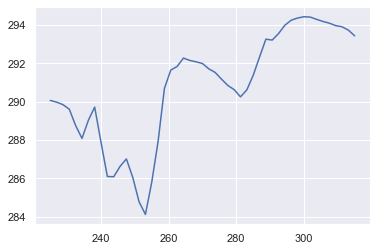

In [70]:
iplt.plot(ts)
plt.show()

### For comparison, lets plot the result of `iplt.plot` next to `qplt.plot`:

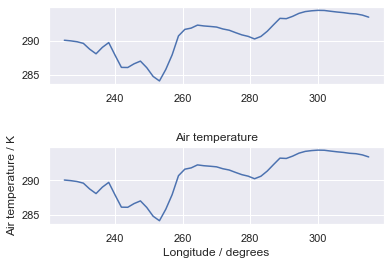

In [71]:
plt.subplot(2, 1, 1)
iplt.plot(ts)

plt.subplot(2, 1, 2)
qplt.plot(ts)

plt.subplots_adjust(hspace=0.8)
plt.show()

### 2d contour plot:

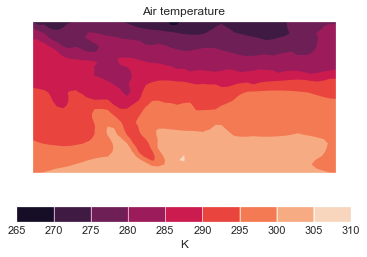

In [72]:
qplt.contourf(cube_7[-1, :, :])
plt.show()

## Maps with cartopy

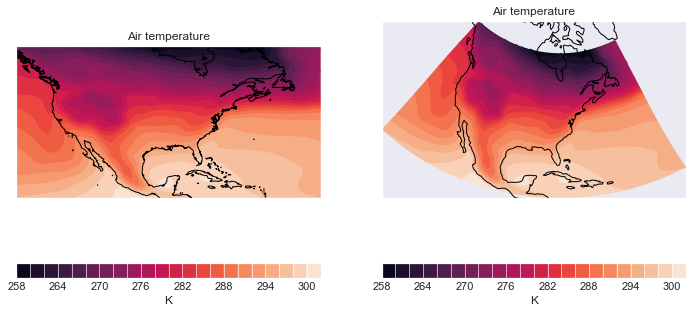

In [73]:
import cartopy.crs as ccrs

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
qplt.contourf(cube_7[0, ...], 25)
ax = plt.gca()
ax.coastlines()

ax = plt.subplot(1, 2, 2, projection=ccrs.RotatedPole(100, 37))
qplt.contourf(cube_7[0, ...], 25)
ax.coastlines()

plt.show()

## Cube maths

In [74]:
a1b = iris.load_cube(iris.sample_data_path('A1B_north_america.nc'))
e1 = iris.load_cube(iris.sample_data_path('E1_north_america.nc'))

In [75]:
print(e1.summary(True))

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)


In [76]:
print(a1b)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


### To find the difference b/n these two cubes, we can do this by adding the following lines of code

In [77]:
scenario_difference = a1b - e1
print(scenario_difference)

unknown / (K)                       (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m


### Cube broadcasting is also possible

In [78]:
print(e1 + 5.0)

unknown / (K)                       (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m


## OPeNDAP

### `Xarray` includes support for `OPeNDAP` (via `netCDF4 library` or `Pydap`), which lets us access large datasets over HTTP.

### For example, we can open a connection to GBs of weather data produced by the PRISM project, and hosted by IRI at Columbia

####  If the dataset don't follow `CF conventions`, we can use decode_cf=False option 

####  `decode_times=False` can be used if the time axis doesnt follow the xarray calendar

In [79]:
remote_data = xr.open_dataset("http://iridl.ldeo.columbia.edu/SOURCES/.OSU/.PRISM/.monthly/dods", 
                              decode_times=False, decode_cf=False)
remote_data

<xarray.Dataset>
Dimensions:  (T: 1420, X: 1405, Y: 621)
Coordinates:
  * X        (X) float32 -125.0 -125.0 -124.9 -124.9 ... -66.58 -66.54 -66.5
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 ... 636.5 637.5 638.5 639.5
  * Y        (Y) float32 49.92 49.88 49.83 49.79 ... 24.21 24.17 24.12 24.08
Data variables:
    ppt      (T, Y, X) int32 ...
    tdmean   (T, Y, X) int32 ...
    tmax     (T, Y, X) int32 ...
    tmin     (T, Y, X) int32 ...
Attributes:
    Conventions:  IRIDL

### We can `select` and `slice` the data and nothing is loaded until we look at particular values:

In [80]:
tmax_1 = remote_data["tmax"][:500, ::3, ::3]
tmax_1

<xarray.DataArray 'tmax' (T: 500, Y: 207, X: 469)>
[48541500 values with dtype=int32]
Coordinates:
  * X        (X) float32 -125.0 -124.9 -124.8 -124.6 ... -66.75 -66.62 -66.5
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 ... -282.5 -281.5 -280.5
  * Y        (Y) float32 49.92 49.79 49.67 49.54 ... 24.54 24.42 24.29 24.17
Attributes:
    pointwidth:     120
    scale_factor:   0.01
    units:          Celsius_scale
    missing_value:  -9999
    standard_name:  air_temperature

# Rasterio

### `GeoTIFFs` and other `gridded raster datasets` can be opened using `rasterio`

In [81]:
import rasterio

In [82]:
print(rasterio.__version__)

1.2.2


In [83]:
rio_temp = xr.open_rasterio("two_months_temp_data.tif")
rio_temp

<xarray.DataArray (band: 2, y: 444, x: 922)>
[818736 values with dtype=float32]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 25.16 25.22 25.28 25.34 ... 52.66 52.72 52.78 52.84
  * x        (x) float64 235.4 235.5 235.5 235.6 ... 292.8 292.8 292.9 293.0
Attributes:
    transform:      (0.0625, 0.0, 235.375, 0.0, 0.06250000000000001, 25.12500...
    res:            (0.0625, -0.06250000000000001)
    is_tiled:       0
    nodatavals:     (-9999.0, -9999.0)
    scales:         (1.0, 1.0)
    offsets:        (0.0, 0.0)
    descriptions:   ('Monthly Average of Daily Maximum Near-Surface Air Tempe...
    cell_methods:   time: maximum(interval: 24 hours);mean over days
    grid_mapping:   crs
    height:         2 m
    long_name:      Monthly Average of Daily Maximum Near-Surface Air Tempera...
    standard_name:  air_temperature
    units:          K

# rioxarray

`rioxarray` can be used to read the `GeoTiff`, `netCDF` or other `GDAL` readable raster data 

`rioxarray` can also handle geospatial related tasks such as `re-projecting` and `clipping`

In [84]:
import rioxarray

In [85]:
rds = rioxarray.open_rasterio("four_day_temp_data.tif")
rds

<xarray.DataArray (band: 4, y: 6, x: 4)>
array([[[292.90222, 289.00974, 286.23273, 287.9828 ],
        [289.88028, 286.77942, 284.04324, 285.35574],
        [286.47382, 284.14078, 279.85153, 283.72025],
        [283.35284, 284.0136 , 279.87567, 279.53195],
        [282.32556, 281.9877 , 281.95645, 279.46677],
        [286.28384, 282.55887, 279.17514, 284.26315]],

       [[300.19128, 296.7296 , 293.8289 , 296.13873],
        [299.35608, 294.66284, 292.50696, 294.30994],
        [294.9574 , 290.4138 , 288.66537, 292.8033 ],
        [291.451  , 291.42194, 287.3495 , 287.7914 ],
        [289.42795, 289.47644, 290.0844 , 289.01837],
        [293.52542, 289.8963 , 287.7356 , 292.70718]],

       [[299.5229 , 297.0215 , 294.44507, 296.7901 ],
        [298.1521 , 295.28076, 292.9342 , 295.2366 ],
        [294.50513, 289.80286, 288.8469 , 293.2457 ],
        [291.75357, 290.3612 , 286.9284 , 287.637  ],
        [288.88922, 288.68896, 289.9805 , 288.78784],
        [292.07236, 288.39923, 287.48813, 292.51904]],

       [[300.68015, 297.6164 , 294.60062, 296.69235],
        [299.2151 , 295.2846 , 292.9373 , 294.81125],
        [294.43927, 290.02887, 289.08377, 292.5965 ],
        [291.0205 , 290.59268, 287.2457 , 287.51898],
        [286.54865, 289.36954, 289.96432, 288.88818],
        [290.98703, 288.53845, 287.4642 , 292.7158 ]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4
  * y            (y) float64 4.241 5.183 6.126 7.068 8.01 8.953
  * x            (x) float64 36.25 37.5 38.75 40.0
    spatial_ref  int64 0
Attributes:
    _FillValue:    9.999999616903162e+35
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     2m air temperature
    grid_mapping:  spatial_ref

## Set crs using `rio.write_crs`

In [86]:
rds32618 = rds.rio.write_crs("epsg:32618")

In [87]:
rds32618.rio.crs

CRS.from_epsg(32618)

## Re project the crs

In [88]:
rds4326 = rds32618.rio.reproject("epsg:4326")

In [89]:
rds4326.rio.crs

CRS.from_epsg(4326)

# Zarr

### `Zarr` is a `Python package` that provides an implementation of `chunked`, `compressed`, `N-dimensional arrays`

### Zarr has the ability to store arrays in a range of ways including in:
`memory` <br>
`files` <br>
`cloud-based object storage` such as `Amazon S3` and `Google Cloud Storage` 

### `Zarr` allow to store and analyze datasets far too large fit onto disk (particularly in combination with dask).

### To write a dataset with `zarr`, we use the `Dataset.to_zarr()` method

In [90]:
ds = xr.Dataset({"foo": (("x", "y"), np.random.rand(4, 5))}, 
                coords={"x": [10, 20, 30, 40], "y": pd.date_range("2000-01-01", periods=5),
                        "z": ("x", list("abcd")),},)

In [91]:
import zarr

In [93]:
ds.to_zarr("ds_1.zarr")

In [94]:
ds_zarr = xr.open_zarr("ds_1.zarr")
ds_zarr

<xarray.Dataset>
Dimensions:  (x: 4, y: 5)
Coordinates:
  * x        (x) int64 10 20 30 40
  * y        (y) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-04 2000-01-05
    z        (x) <U1 dask.array<chunksize=(4,), meta=np.ndarray>
Data variables:
    foo      (x, y) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>